In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import draw

import matplotlib.patches as patches

In [3]:
####################
# HELPER FUNCTIONS #
####################

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

# Load MNIST function

In [7]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

X = mnist.train._images.reshape(55000,784)
Y = mnist.train._labels
index = np.arange(55000)
np.random.shuffle(index)

train_bf = draw.BatchFeeder(X[index[:54000]], Y[index[:54000]], 128)
valid_bf = draw.BatchFeeder(X[index[54000:]], Y[index[54000:]], 128)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Here is a sample of NNIST data

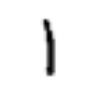

In [8]:
x, y = train_bf.next()
plt.figure(figsize=(1,1))
plt.imshow(x[0].reshape((28,28)), cmap='Greys')
plt.yticks([],[])
plt.xticks([],[])
plt.show()

# Train the DRAW model

We train the DRAW model for 10 drawing steps for about 1000 epochs.

In [9]:
model = draw.DRAW(10)

In [43]:
model.train(train_bf, 10, valid_bf)

Epoch:21 train_cost: 102.812 valid_cost: 102.632 ( 23.1594 79.6523 )
Epoch:22 train_cost: 102.508 valid_cost: 102.591 ( 23.2162 79.2918 )
Epoch:23 train_cost: 101.986 valid_cost: 100.988 ( 23.1692 78.817 )
Epoch:24 train_cost: 101.468 valid_cost: 100.721 ( 23.1239 78.344 )
Epoch:25 train_cost: 101.26 valid_cost: 100.759 ( 23.1332 78.127 )
Epoch:26 train_cost: 100.748 valid_cost: 100.417 ( 23.0629 77.6849 )
Epoch:27 train_cost: 100.441 valid_cost: 100.7 ( 22.9943 77.4469 )
Epoch:28 train_cost: 100.097 valid_cost: 99.5714 ( 23.0105 77.0869 )
Epoch:29 train_cost: 99.9681 valid_cost: 99.4532 ( 23.0261 76.9419 )
Epoch:30 train_cost: 99.4337 valid_cost: 98.5663 ( 22.9088 76.5249 )


# Insepect the reconstructed training samples

In [89]:
b0, b1 = 1, -2

label: 1
(5, 10)


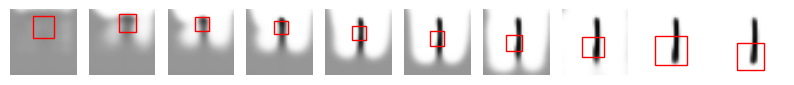

In [97]:
index = np.random.randint(50000)
sample = model.record["cs"][index].reshape(28,28,10)
mux = model.record["mu_x"][index]
muy = model.record["mu_y"][index]
print "label:", np.argmax(model.record["y"][index])
plt.figure(figsize=(10,2))
print mux.shape
for i in range(10):
    x1, x2 = mux[:, i][b0], mux[:, i][b1]
    y1, y2 = muy[:, i][b0], muy[:, i][b1]
    ax = plt.subplot(1,10,i+1)
    rect = patches.Rectangle((x1,y1),x2-x1,y2-y1,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    ax.imshow(sigmoid(sample[:,:,i]), vmin=0, vmax=1)
    ax.set_xticks([],[])
    ax.set_yticks([],[])
plt.savefig("figures/reconstructed_"+str(index)+".png")
plt.show()

# Generate a sample by drawing from latent distributions.

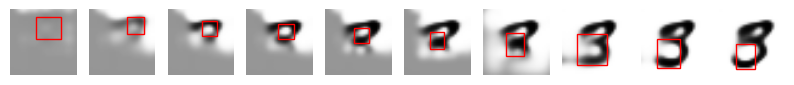

In [114]:
generated, mux, muy = model.generate()
index = -1
images = generated[index].reshape((28, 28, 10))

plt.figure(figsize=(10,2))
for i in range(10):
    x1, x2 = mux[index][:, i][b0], mux[index][:, i][b1]
    y1, y2 =  muy[index][:, i][b0], muy[index][:, i][b1]
    ax = plt.subplot(1,10,i+1)
    rect = patches.Rectangle((x1,y1),x2-x1,y2-y1,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    ax.imshow(sigmoid(images[:,:,i]), vmin=0, vmax=1)
    ax.set_xticks([],[])
    ax.set_yticks([],[])
plt.savefig("figures/generated_"+str(np.random.randint(100000))+".png")
plt.show()